# **Supervised Learning: Prasmulyan's Preference of Clothing**


Out topic of research is on determening the preference of clothes in the civities of Prasmul Undergraduate Students, either preferring to wear KEMEJA or KAOS. We are using Supervised Learning with three methods (KNN, Decision Forest, Random Forest) and we will compare which of the methods gives the best results for our real case.

 __[Dataset](https://docs.google.com/spreadsheets/d/1CFKJqtYEE0HA2fNn39-_QpMOCyH3O14GYe77x-J9O4U/edit?usp=sharing)__

## **About the Dataset**
This is a simulated dataset **13 Independent variables**

\$PakaianKampus\$ : Student's Attire When Going to Campus

\$BudgetFashion\$ : Monthly Clothing Budget

\$BudgetKaos\$ : Monthly Budget for T-shirts

\$BudgetKemeja\$ : Monthly Budget for Shirts

\$JumlahPakaianPurchased\$ : How Many Times a Student Buys Clothes Per Month (Average)

\$JAIM\$ : Is the Student Someone Who Cares About Their Appearance?

\$OversizeSlimfit\$ : Student Clothing Preference (Oversize/Slimfit)

\$Keringat\$ : Does the Student Sweat Easily?

\$DosenFormal\$ : Does the Student Have a Lecturer Who Requires Formal Attire?

\$JumlahKemeja\$ : Number of Shirts Owned by the Student

\$JumlahKaos\$ : Number of T-shirts Owned by the Student

\$PakaianSeringPakai\$ : Student Attire When Going Out (Non-Campus)

\$KaosDiKelas\$ : Number of T-shirt Wearers in the Student's Class

\$TerangGelap\$ : Student Color Preference for Clothing (Bright/Dark)

<div style="height:5px; background: linear-gradient(to right, purple, blue);"></div>

<h2 style="color:navy;">1. Reading the Data</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics, preprocessing
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import sklearn

import sys
import warnings
warnings.filterwarnings('ignore')

# Reading the csv file using pandas
url = 'https://docs.google.com/spreadsheets/d/1CFKJqtYEE0HA2fNn39-_QpMOCyH3O14GYe77x-J9O4U/export?format=csv'
data1=pd.read_csv(url)
data=data1.drop("Timestamp",axis=1)
data=data.drop("Unnamed: 22",axis=1)
data=data.drop("Unnamed: 23",axis=1)
data=data.drop("Unnamed: 24",axis=1)
data=data.drop("Form Response Edit URL",axis=1)
# Showing first five rows of the dataset
data.head()

,Apakah Anda mahasiswa Prasetiya Mulya?,Gender,Usia,Fakultas,Jurusan,Angkatan,Domisili,"Ketika Anda pergi ke kampus, apakah anda lebih suka memakai kaos atau kemeja?",Berapa rata-rata budget yang dikeluarkan untuk membeli pakaian per bulan?,Berapa rata-rata budget yang dikeluarkan untuk membeli kaos per bulan?,...,Berapa jumlah rata-rata pembelian pakaian dalam sebulan?,Apakah Anda merupakan orang yang memperhatikan penampilan?,Manakah yang menurut Anda lebih nyaman dipakai?,Apakah Anda mudah berkeringat?,Apakah Anda memiliki peraturan berpakaian formal dari dosen kelas?,Berapa jumlah kemeja yang Anda miliki?,Berapa jumlah kaos yang Anda miliki?,Pakaian yang sering dipakai saat berpergian.,Berapa banyak orang yang menggunakan kaos di kelas Anda?,Preferensi warna pakaian Anda.
0,Iya,Laki-laki,21,STEM,Business Mathematics,2020.0,Jabodetabek,Kaos,2000000,1000000,...,5,Iya,Oversize,Tidak,Tidak,40,100,Kaos,25,Terang
1,Iya,Perempuan,21,STEM,Business Mathematics,2020.0,Jabodetabek,Kaos,1000000,500000,...,8,Iya,Oversize,Tidak,Tidak,15,20,Kaos,25,Gelap
2,Iya,Perempuan,20,STEM,Business Mathematics,2020.0,Jabodetabek,Kaos,20000,100000,...,1,Iya,Oversize,Tidak,Tidak,10,5,Kaos,7,Terang
3,Iya,Perempuan,20,SBE,Accounting,2020.0,Jabodetabek,Kemeja,300000,50000,...,2,Iya,Slimfit,Tidak,Tidak,10,10,Kemeja,10,Terang
4,Iya,Laki-laki,21,STEM,Business Mathematics,2020.0,Jabodetabek,Kaos,500000,150000,...,2,Iya,Oversize,Tidak,Tidak,5,6,Kaos,15,Gelap


<div style="height:5px; background: linear-gradient(to right, purple, blue);"></div>

<h2 style="color:navy;">2. Data Information</h2>

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 21 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Apakah Anda mahasiswa Prasetiya Mulya?                                         310 non-null    object 
 1   Gender                                                                         307 non-null    object 
 2   Usia                                                                           307 non-null    object 
 3   Fakultas                                                                       307 non-null    object 
 4   Jurusan                                                                        307 non-null    object 
 5   Angkatan                                                                       307 non-null    float64
 6   Domisili                  

In [3]:
print("Number of Rows:", data.shape[0])
print("Number of Columns:", data.shape[1])

Number of Rows: 310
Number of Columns: 21


In [4]:
data.head(5)

,Apakah Anda mahasiswa Prasetiya Mulya?,Gender,Usia,Fakultas,Jurusan,Angkatan,Domisili,"Ketika Anda pergi ke kampus, apakah anda lebih suka memakai kaos atau kemeja?",Berapa rata-rata budget yang dikeluarkan untuk membeli pakaian per bulan?,Berapa rata-rata budget yang dikeluarkan untuk membeli kaos per bulan?,...,Berapa jumlah rata-rata pembelian pakaian dalam sebulan?,Apakah Anda merupakan orang yang memperhatikan penampilan?,Manakah yang menurut Anda lebih nyaman dipakai?,Apakah Anda mudah berkeringat?,Apakah Anda memiliki peraturan berpakaian formal dari dosen kelas?,Berapa jumlah kemeja yang Anda miliki?,Berapa jumlah kaos yang Anda miliki?,Pakaian yang sering dipakai saat berpergian.,Berapa banyak orang yang menggunakan kaos di kelas Anda?,Preferensi warna pakaian Anda.
0,Iya,Laki-laki,21,STEM,Business Mathematics,2020.0,Jabodetabek,Kaos,2000000,1000000,...,5,Iya,Oversize,Tidak,Tidak,40,100,Kaos,25,Terang
1,Iya,Perempuan,21,STEM,Business Mathematics,2020.0,Jabodetabek,Kaos,1000000,500000,...,8,Iya,Oversize,Tidak,Tidak,15,20,Kaos,25,Gelap
2,Iya,Perempuan,20,STEM,Business Mathematics,2020.0,Jabodetabek,Kaos,20000,100000,...,1,Iya,Oversize,Tidak,Tidak,10,5,Kaos,7,Terang
3,Iya,Perempuan,20,SBE,Accounting,2020.0,Jabodetabek,Kemeja,300000,50000,...,2,Iya,Slimfit,Tidak,Tidak,10,10,Kemeja,10,Terang
4,Iya,Laki-laki,21,STEM,Business Mathematics,2020.0,Jabodetabek,Kaos,500000,150000,...,2,Iya,Oversize,Tidak,Tidak,5,6,Kaos,15,Gelap


In [5]:
data.tail(5)

,Apakah Anda mahasiswa Prasetiya Mulya?,Gender,Usia,Fakultas,Jurusan,Angkatan,Domisili,"Ketika Anda pergi ke kampus, apakah anda lebih suka memakai kaos atau kemeja?",Berapa rata-rata budget yang dikeluarkan untuk membeli pakaian per bulan?,Berapa rata-rata budget yang dikeluarkan untuk membeli kaos per bulan?,...,Berapa jumlah rata-rata pembelian pakaian dalam sebulan?,Apakah Anda merupakan orang yang memperhatikan penampilan?,Manakah yang menurut Anda lebih nyaman dipakai?,Apakah Anda mudah berkeringat?,Apakah Anda memiliki peraturan berpakaian formal dari dosen kelas?,Berapa jumlah kemeja yang Anda miliki?,Berapa jumlah kaos yang Anda miliki?,Pakaian yang sering dipakai saat berpergian.,Berapa banyak orang yang menggunakan kaos di kelas Anda?,Preferensi warna pakaian Anda.
305,Iya,Laki-laki,21,SBE,Business Management,2020.0,Jabodetabek,Kemeja,1000000,300000,...,3,Iya,Slimfit,Tidak,Iya,6,20,Kemeja,15,Terang
306,Iya,Laki-laki,21,STEM,Product Design Innovation,2020.0,Di Luar Jabodetabek,Kemeja,1000000,300000,...,3,Iya,Oversize,Tidak,Tidak,5,20,Kaos,20,Terang
307,Iya,Laki-laki,18,STEM,Business Mathematics,2022.0,Jabodetabek,Kemeja,500000,0,...,1,Iya,Slimfit,Iya,Iya,5,20,Kemeja,10,Gelap
308,Iya,Laki-laki,21,STEM,Food Business Technology,2019.0,Jabodetabek,Kaos,300000,300000,...,1,Iya,Oversize,Tidak,Tidak,5,15,Kaos,15,Gelap
309,Iya,Laki-laki,19,SBE,Business Economics,2019.0,Jabodetabek,Kaos,300000,150000,...,1,Tidak,Oversize,Iya,Tidak,5,10,Kaos,10,Terang


<div style="height:5px; background: linear-gradient(to right, purple, blue);"></div>

<h2 style="color:navy;">3. Checking Missing Value</h2>

In [6]:
data.isnull().sum()

Apakah Anda mahasiswa Prasetiya Mulya?                                           0
Gender                                                                           3
Usia                                                                             3
Fakultas                                                                         3
Jurusan                                                                          3
Angkatan                                                                         3
Domisili                                                                         3
Ketika Anda pergi ke kampus, apakah anda lebih suka memakai kaos atau kemeja?    3
Berapa rata-rata budget yang dikeluarkan untuk membeli pakaian per bulan?        3
Berapa rata-rata budget yang dikeluarkan untuk membeli kaos per bulan?           3
Berapa rata-rata budget yang dikeluarkan untuk membeli kemeja per bulan?         3
Berapa jumlah rata-rata pembelian pakaian dalam sebulan?                         3
Apak

In [7]:
data.shape

(310, 21)

In [8]:
data=data.rename(columns={"Apakah Anda mahasiswa Prasetiya Mulya?":"Prasmulyan"})

In [9]:
data.Prasmulyan.unique()

array(['Iya', 'Tidak'], dtype=object)

<h2 style="color:blue;">Clean Non-Prasmulyan Data</h2>

In [10]:
invaliddata = data[data['Prasmulyan'].str.contains('Tidak')]
print(invaliddata)

    Prasmulyan Gender Usia Fakultas Jurusan  Angkatan Domisili  \
13       Tidak    NaN  NaN      NaN     NaN       NaN      NaN   
89       Tidak    NaN  NaN      NaN     NaN       NaN      NaN   
122      Tidak    NaN  NaN      NaN     NaN       NaN      NaN   

    Ketika Anda pergi ke kampus, apakah anda lebih suka memakai kaos atau kemeja?  \
13                                                 NaN                              
89                                                 NaN                              
122                                                NaN                              

    Berapa rata-rata budget yang dikeluarkan untuk membeli pakaian per bulan?  \
13                                                 NaN                          
89                                                 NaN                          
122                                                NaN                          

    Berapa rata-rata budget yang dikeluarkan untuk membeli kaos per b

In [11]:
data = data.drop(labels=[13,89,122], axis=0)

In [12]:
data.Prasmulyan.unique()

array(['Iya'], dtype=object)

In [13]:
data.head()

,Prasmulyan,Gender,Usia,Fakultas,Jurusan,Angkatan,Domisili,"Ketika Anda pergi ke kampus, apakah anda lebih suka memakai kaos atau kemeja?",Berapa rata-rata budget yang dikeluarkan untuk membeli pakaian per bulan?,Berapa rata-rata budget yang dikeluarkan untuk membeli kaos per bulan?,...,Berapa jumlah rata-rata pembelian pakaian dalam sebulan?,Apakah Anda merupakan orang yang memperhatikan penampilan?,Manakah yang menurut Anda lebih nyaman dipakai?,Apakah Anda mudah berkeringat?,Apakah Anda memiliki peraturan berpakaian formal dari dosen kelas?,Berapa jumlah kemeja yang Anda miliki?,Berapa jumlah kaos yang Anda miliki?,Pakaian yang sering dipakai saat berpergian.,Berapa banyak orang yang menggunakan kaos di kelas Anda?,Preferensi warna pakaian Anda.
0,Iya,Laki-laki,21,STEM,Business Mathematics,2020.0,Jabodetabek,Kaos,2000000,1000000,...,5,Iya,Oversize,Tidak,Tidak,40,100,Kaos,25,Terang
1,Iya,Perempuan,21,STEM,Business Mathematics,2020.0,Jabodetabek,Kaos,1000000,500000,...,8,Iya,Oversize,Tidak,Tidak,15,20,Kaos,25,Gelap
2,Iya,Perempuan,20,STEM,Business Mathematics,2020.0,Jabodetabek,Kaos,20000,100000,...,1,Iya,Oversize,Tidak,Tidak,10,5,Kaos,7,Terang
3,Iya,Perempuan,20,SBE,Accounting,2020.0,Jabodetabek,Kemeja,300000,50000,...,2,Iya,Slimfit,Tidak,Tidak,10,10,Kemeja,10,Terang
4,Iya,Laki-laki,21,STEM,Business Mathematics,2020.0,Jabodetabek,Kaos,500000,150000,...,2,Iya,Oversize,Tidak,Tidak,5,6,Kaos,15,Gelap


In [14]:
data=data.rename(columns={"Ketika Anda pergi ke kampus, apakah anda lebih suka memakai kaos atau kemeja?":"PakaianKampus","Berapa rata-rata budget yang dikeluarkan untuk membeli pakaian per bulan?":"BudgetFashion","Berapa rata-rata budget yang dikeluarkan untuk membeli kaos per bulan?":"BudgetKaos","Berapa rata-rata budget yang dikeluarkan untuk membeli kemeja per bulan?":"BudgetKemeja","Berapa jumlah rata-rata pembelian pakaian dalam sebulan?":"JumlahPakaianPurchased","Apakah Anda merupakan orang yang memperhatikan penampilan?":"JAIM","Manakah yang menurut Anda lebih nyaman dipakai?":"OversizeSlimfit","Apakah Anda mudah berkeringat?":"Keringat","Apakah Anda memiliki peraturan berpakaian formal dari dosen kelas?":"DosenFormal","Berapa jumlah kemeja yang Anda miliki?":"JumlahKemeja","Berapa jumlah kaos yang Anda miliki?":"JumlahKaos","Pakaian yang sering dipakai saat berpergian.":"PakaianSeringPakai","Berapa banyak orang yang menggunakan kaos di kelas Anda?":"KaosDiKelas","Preferensi warna pakaian Anda.":"TerangGelap"})
data.head()

,Prasmulyan,Gender,Usia,Fakultas,Jurusan,Angkatan,Domisili,PakaianKampus,BudgetFashion,BudgetKaos,...,JumlahPakaianPurchased,JAIM,OversizeSlimfit,Keringat,DosenFormal,JumlahKemeja,JumlahKaos,PakaianSeringPakai,KaosDiKelas,TerangGelap
0,Iya,Laki-laki,21,STEM,Business Mathematics,2020.0,Jabodetabek,Kaos,2000000,1000000,...,5,Iya,Oversize,Tidak,Tidak,40,100,Kaos,25,Terang
1,Iya,Perempuan,21,STEM,Business Mathematics,2020.0,Jabodetabek,Kaos,1000000,500000,...,8,Iya,Oversize,Tidak,Tidak,15,20,Kaos,25,Gelap
2,Iya,Perempuan,20,STEM,Business Mathematics,2020.0,Jabodetabek,Kaos,20000,100000,...,1,Iya,Oversize,Tidak,Tidak,10,5,Kaos,7,Terang
3,Iya,Perempuan,20,SBE,Accounting,2020.0,Jabodetabek,Kemeja,300000,50000,...,2,Iya,Slimfit,Tidak,Tidak,10,10,Kemeja,10,Terang
4,Iya,Laki-laki,21,STEM,Business Mathematics,2020.0,Jabodetabek,Kaos,500000,150000,...,2,Iya,Oversize,Tidak,Tidak,5,6,Kaos,15,Gelap


<h2 style="color:blue;">Main Data</h2>

In [15]:
df=data.drop(labels=["Prasmulyan","Gender","Usia","Fakultas","Jurusan","Angkatan","Domisili"],axis=1)
df.head()

,PakaianKampus,BudgetFashion,BudgetKaos,BudgetKemeja,JumlahPakaianPurchased,JAIM,OversizeSlimfit,Keringat,DosenFormal,JumlahKemeja,JumlahKaos,PakaianSeringPakai,KaosDiKelas,TerangGelap
0,Kaos,2000000,1000000,1000000,5,Iya,Oversize,Tidak,Tidak,40,100,Kaos,25,Terang
1,Kaos,1000000,500000,500000,8,Iya,Oversize,Tidak,Tidak,15,20,Kaos,25,Gelap
2,Kaos,20000,100000,200000,1,Iya,Oversize,Tidak,Tidak,10,5,Kaos,7,Terang
3,Kemeja,300000,50000,300000,2,Iya,Slimfit,Tidak,Tidak,10,10,Kemeja,10,Terang
4,Kaos,500000,150000,200000,2,Iya,Oversize,Tidak,Tidak,5,6,Kaos,15,Gelap


<div style="height:5px; background: linear-gradient(to right, purple, blue);"></div>

<h2 style="color:navy;">4. Renaming Columns</h2>

In [16]:
df=df.rename(columns={"Ketika Anda pergi ke kampus, apakah anda lebih suka memakai kaos atau kemeja?":"PakaianKampus","Berapa rata-rata budget yang dikeluarkan untuk membeli pakaian per bulan?":"BudgetFashion","Berapa rata-rata budget yang dikeluarkan untuk membeli kaos per bulan?":"BudgetKaos","Berapa rata-rata budget yang dikeluarkan untuk membeli kemeja per bulan?":"BudgetKemeja","Berapa jumlah rata-rata pembelian pakaian dalam sebulan?":"JumlahPakaianPurchased","Apakah Anda merupakan orang yang memperhatikan penampilan?":"JAIM","Manakah yang menurut Anda lebih nyaman dipakai?":"OversizeSlimfit","Apakah Anda mudah berkeringat?":"Keringat","Apakah Anda memiliki peraturan berpakaian formal dari dosen kelas?":"DosenFormal","Berapa jumlah kemeja yang Anda miliki?":"JumlahKemeja","Berapa jumlah kaos yang Anda miliki?":"JumlahKaos","Pakaian yang sering dipakai saat berpergian.":"PakaianSeringPakai","Berapa banyak orang yang menggunakan kaos di kelas Anda?":"KaosDiKelas","Preferensi warna pakaian Anda.":"TerangGelap"})
df.head()

,PakaianKampus,BudgetFashion,BudgetKaos,BudgetKemeja,JumlahPakaianPurchased,JAIM,OversizeSlimfit,Keringat,DosenFormal,JumlahKemeja,JumlahKaos,PakaianSeringPakai,KaosDiKelas,TerangGelap
0,Kaos,2000000,1000000,1000000,5,Iya,Oversize,Tidak,Tidak,40,100,Kaos,25,Terang
1,Kaos,1000000,500000,500000,8,Iya,Oversize,Tidak,Tidak,15,20,Kaos,25,Gelap
2,Kaos,20000,100000,200000,1,Iya,Oversize,Tidak,Tidak,10,5,Kaos,7,Terang
3,Kemeja,300000,50000,300000,2,Iya,Slimfit,Tidak,Tidak,10,10,Kemeja,10,Terang
4,Kaos,500000,150000,200000,2,Iya,Oversize,Tidak,Tidak,5,6,Kaos,15,Gelap


<h2 style="color:blue;">Clean Main Data from Invalid Value</h2>

In [17]:
data.BudgetFashion = data.BudgetFashion.str.lower()

def fix_name(x,y):
    data.BudgetFashion.replace(x,y,inplace=True)

fix_name('300000 (tiga ratus ribu rupiah)','300000')
fix_name('100.000-150.000','125000')
fix_name('200000 - 500000','350000')
fix_name('tidak menentu ( 300000-500000 )','400000')
fix_name('2','200000')
fix_name("-","0")

In [18]:
df.BudgetFashion = df.BudgetFashion.str.lower()

def fix_name(x,y):
    df.BudgetFashion.replace(x,y,inplace=True)

fix_name('300000 (tiga ratus ribu rupiah)','300000')
fix_name('100.000-150.000','125000')
fix_name('200000 - 500000','350000')
fix_name('tidak menentu ( 300000-500000 )','400000')
fix_name('2','200000')
fix_name("-","0")

In [19]:
df.BudgetKaos = df.BudgetKaos.str.lower()

def fix_name(x,y):
    df.BudgetKaos.replace(x,y,inplace=True)

fix_name('100000 (seratus ribu rupiah)','100000')
fix_name('300000-','300000')
fix_name('-','0')
fix_name('150000-200000','175000')
fix_name('2','200000')

In [20]:
df.BudgetKemeja = df.BudgetKemeja.str.lower()

def fix_name(x,y):
    df.BudgetKemeja.replace(x,y,inplace=True)

fix_name('jarang (-)','0')
fix_name('200000-300000','250000')
fix_name('-','0')
fix_name('2','200000')

In [21]:
df.JumlahPakaianPurchased = df.JumlahPakaianPurchased.str.lower()

def fix_name(x,y):
    df.JumlahPakaianPurchased.replace(x,y,inplace=True)

fix_name('2-3 kali','2')
fix_name('1月2日','2')
fix_name('3-4 kali','3')
fix_name('depends, biasanya 3','3')
fix_name('<1','0')
fix_name('1-2','1')

In [22]:
df.Keringat = df.Keringat.str.lower()

def fix_name(x,y):
    df.Keringat.replace(x,y,inplace=True)

fix_name('ya','iya')
fix_name('iya','Iya')
fix_name('tidak','Tidak')

In [23]:
df.JumlahKemeja = df.JumlahKemeja.str.lower()

def fix_name(x,y):
    df.JumlahKemeja.replace(x,y,inplace=True)

fix_name('>35','35')
fix_name('>10','10')
fix_name('banyak :)','invalid')

In [24]:
invaliddata1 = df[df['JumlahKemeja'].str.contains('invalid')]
invaliddata1

,PakaianKampus,BudgetFashion,BudgetKaos,BudgetKemeja,JumlahPakaianPurchased,JAIM,OversizeSlimfit,Keringat,DosenFormal,JumlahKemeja,JumlahKaos,PakaianSeringPakai,KaosDiKelas,TerangGelap
33,Kaos,125000,50000,100000,2,Iya,Slimfit,Iya,Iya,invalid,10,Kaos,10,Gelap


In [25]:
df = df.drop(labels=[33], axis=0)

In [26]:
df.JumlahKaos = df.JumlahKaos.str.lower()

def fix_name(x,y):
    df.JumlahKaos.replace(x,y,inplace=True)

fix_name('>35','35')
fix_name('> 15','15')
fix_name('>20','20')
fix_name('-2','2')

In [27]:
df.KaosDiKelas = df.KaosDiKelas.str.lower()

def fix_name(x,y):
    df.KaosDiKelas.replace(x,y,inplace=True)

fix_name('-','0')

df.head()

,PakaianKampus,BudgetFashion,BudgetKaos,BudgetKemeja,JumlahPakaianPurchased,JAIM,OversizeSlimfit,Keringat,DosenFormal,JumlahKemeja,JumlahKaos,PakaianSeringPakai,KaosDiKelas,TerangGelap
0,Kaos,2000000,1000000,1000000,5,Iya,Oversize,Tidak,Tidak,40,100,Kaos,25,Terang
1,Kaos,1000000,500000,500000,8,Iya,Oversize,Tidak,Tidak,15,20,Kaos,25,Gelap
2,Kaos,20000,100000,200000,1,Iya,Oversize,Tidak,Tidak,10,5,Kaos,7,Terang
3,Kemeja,300000,50000,300000,2,Iya,Slimfit,Tidak,Tidak,10,10,Kemeja,10,Terang
4,Kaos,500000,150000,200000,2,Iya,Oversize,Tidak,Tidak,5,6,Kaos,15,Gelap


<h2 style="color:blue;">Encode Categorical Data to Numerical</h2>

In [28]:
d =  {'Kaos': 0, 'Kemeja': 1}
df['PakaianKampus'] = df['PakaianKampus'].map(d)
d = {'Iya': 1, 'Tidak': 0}
df['JAIM'] = df['JAIM'].map(d)
d = {'Slimfit': 1, 'Oversize': 0}
df['OversizeSlimfit'] = df['OversizeSlimfit'].map(d)
d = {'Ya': 1, 'Tidak': 0,'Iya': 1}
df['Keringat'] = df['Keringat'].map(d)
d = {'Iya': 1, 'Tidak': 0}
df['DosenFormal'] = df['DosenFormal'].map(d)
d =  {'Kaos': 0, 'Kemeja': 1}
df['PakaianSeringPakai'] = df['PakaianSeringPakai'].map(d)
d = {'Terang': 1, 'Gelap': 0}
df['TerangGelap'] = df['TerangGelap'].map(d)
df.head()

,PakaianKampus,BudgetFashion,BudgetKaos,BudgetKemeja,JumlahPakaianPurchased,JAIM,OversizeSlimfit,Keringat,DosenFormal,JumlahKemeja,JumlahKaos,PakaianSeringPakai,KaosDiKelas,TerangGelap
0,0,2000000,1000000,1000000,5,1,0,0,0,40,100,0,25,1
1,0,1000000,500000,500000,8,1,0,0,0,15,20,0,25,0
2,0,20000,100000,200000,1,1,0,0,0,10,5,0,7,1
3,1,300000,50000,300000,2,1,1,0,0,10,10,1,10,1
4,0,500000,150000,200000,2,1,0,0,0,5,6,0,15,0


In [29]:
df.loc[df.duplicated()]

,PakaianKampus,BudgetFashion,BudgetKaos,BudgetKemeja,JumlahPakaianPurchased,JAIM,OversizeSlimfit,Keringat,DosenFormal,JumlahKemeja,JumlahKaos,PakaianSeringPakai,KaosDiKelas,TerangGelap
115,1,500000,100000,300000,1,1,1,0,1,3,10,1,5,1


In [30]:
df = df.drop(labels=[115], axis=0)

In [31]:
df.loc[df.duplicated()]

,PakaianKampus,BudgetFashion,BudgetKaos,BudgetKemeja,JumlahPakaianPurchased,JAIM,OversizeSlimfit,Keringat,DosenFormal,JumlahKemeja,JumlahKaos,PakaianSeringPakai,KaosDiKelas,TerangGelap


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, 0 to 309
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   PakaianKampus           305 non-null    int64 
 1   BudgetFashion           305 non-null    object
 2   BudgetKaos              305 non-null    object
 3   BudgetKemeja            305 non-null    object
 4   JumlahPakaianPurchased  305 non-null    object
 5   JAIM                    305 non-null    int64 
 6   OversizeSlimfit         305 non-null    int64 
 7   Keringat                305 non-null    int64 
 8   DosenFormal             305 non-null    int64 
 9   JumlahKemeja            305 non-null    object
 10  JumlahKaos              305 non-null    object
 11  PakaianSeringPakai      305 non-null    int64 
 12  KaosDiKelas             305 non-null    object
 13  TerangGelap             305 non-null    int64 
dtypes: int64(7), object(7)
memory usage: 35.7+ KB


In [33]:
data = data.astype({"BudgetFashion":'int64'}) 

In [34]:
df = df.apply(lambda x: x.astype(np.int64), axis=1)
df.dtypes

PakaianKampus             int64
BudgetFashion             int64
BudgetKaos                int64
BudgetKemeja              int64
JumlahPakaianPurchased    int64
JAIM                      int64
OversizeSlimfit           int64
Keringat                  int64
DosenFormal               int64
JumlahKemeja              int64
JumlahKaos                int64
PakaianSeringPakai        int64
KaosDiKelas               int64
TerangGelap               int64
dtype: object

<div style="height:5px; background: linear-gradient(to right, purple, blue);"></div>

<h2 style="color:navy;">5. Descriptive Statistics</h2>

In [35]:
df.describe()

,PakaianKampus,BudgetFashion,BudgetKaos,BudgetKemeja,JumlahPakaianPurchased,JAIM,OversizeSlimfit,Keringat,DosenFormal,JumlahKemeja,JumlahKaos,PakaianSeringPakai,KaosDiKelas,TerangGelap
count,305.000000,3.050000e+02,3.050000e+02,3.050000e+02,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,0.396721,6.632787e+05,3.042790e+05,3.071643e+05,3773.147541,0.632787,0.436066,0.442623,0.318033,7.967213,15.501639,0.314754,12.908197,0.432787
std,0.490021,7.664171e+05,3.944235e+05,4.744076e+05,37964.570895,0.482837,0.496710,0.497513,0.466478,6.026715,11.852472,0.465181,7.502944,0.496276
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.500000e+05,1.000000e+05,1.000000e+05,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000,9.000000,0.000000,7.000000,0.000000
50%,0.000000,4.000000e+05,2.000000e+05,2.000000e+05,2.000000,1.000000,0.000000,0.000000,0.000000,6.000000,12.000000,0.000000,12.000000,0.000000
75%,1.000000,8.000000e+05,3.200000e+05,4.000000e+05,4.000000,1.000000,1.000000,1.000000,1.000000,10.000000,20.000000,1.000000,18.000000,1.000000
max,1.000000,5.000000e+06,3.000000e+06,6.000000e+06,500000.000000,1.000000,1.000000,1.000000,1.000000,40.000000,100.000000,1.000000,50.000000,1.000000


From the descriptive data above, we can see that:

1. The **average budget of respondents for buying clothes each month** is **Rp 663,278.688** with a **standard deviation** of **Rp 766,417.07**.

2. The **average budget of respondents for buying t-shirts each month** is **Rp 304,278.98** with a **standard deviation** of **Rp 394,423.52**.

3. The **average budget of respondents for buying shirts each month** is **Rp 307,164.25** with a **standard deviation** of **Rp 474,407.59**.

4. The **average number of times respondents buy clothes each month** is **3.77 times** with a **standard deviation** of **37.96 times**.

5. The **average number of shirts** respondents have is **7.97** with a **standard deviation** of **6.03**.

6. The **average number of t-shirts** respondents have is **15.50** with a **standard deviation** of **11.85**.

7. The **average number of people wearing t-shirts in the respondents' class** is **12.91** with a **standard deviation** of **7.50**.

<div style="height:5px; background: linear-gradient(to right, purple, blue);"></div>

<h2 style="color:navy;">6. Exploratory Data Analysis</h2>

<h2 style="color:blue;">Chart for Categorical Data</h2>

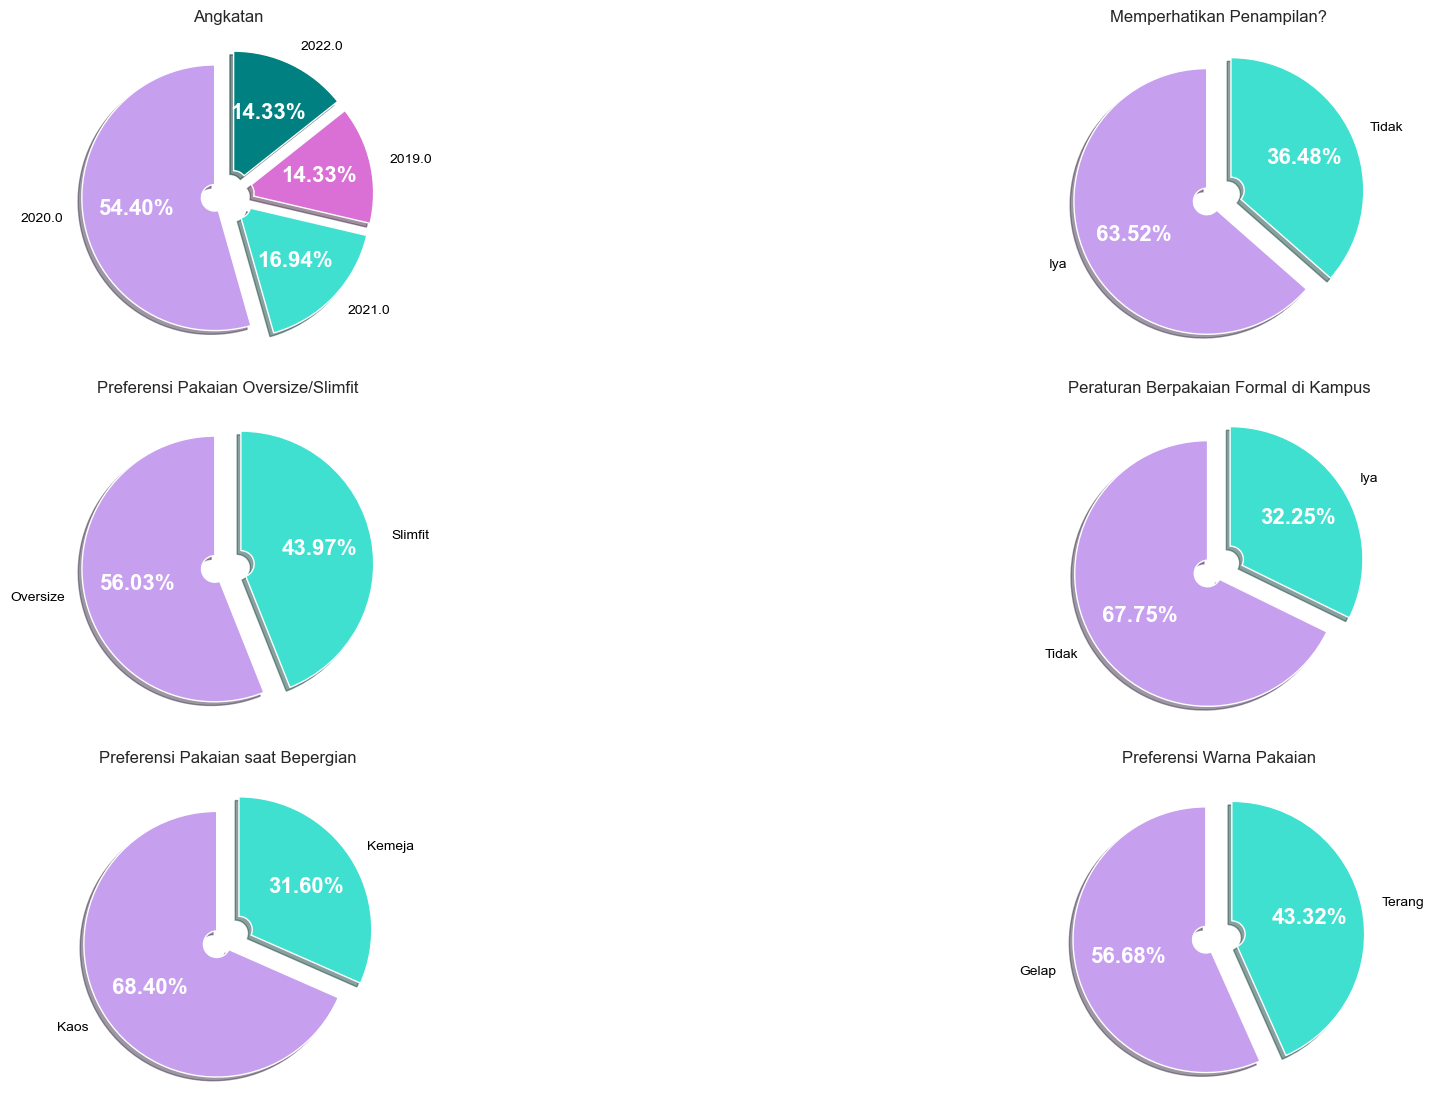

In [36]:
fig, axes = plt.subplots(4, 2, figsize=(20, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

variables = ['Angkatan','JAIM', 'OversizeSlimfit', 'DosenFormal', 'PakaianSeringPakai', 'TerangGelap']
titles = [
    'Angkatan',
    'Memperhatikan Penampilan?',
    'Preferensi Pakaian Oversize/Slimfit',
    'Peraturan Berpakaian Formal di Kampus',
    'Preferensi Pakaian saat Bepergian',
    'Preferensi Warna Pakaian',
]
color_palette = ['#C79FEF', 'turquoise','orchid','teal']
for i, ax in enumerate(axes.flatten()):
    if i < len(variables):
        value_counts = data[variables[i]].value_counts()
        total_count = value_counts.sum()
        wedges, texts, autotexts = ax.pie(value_counts, labels=value_counts.index, startangle=90, wedgeprops=dict(width=0.9),
                                          autopct='%.2f%%', pctdistance=0.6, shadow=True, explode=[0.1] * len(value_counts), colors=color_palette)
        ax.set_ylabel('')
        ax.set_title(titles[i], fontsize=12)
        ax.legend().set_visible(False) 
        
        # Draw a white circle at the center to create the doughnut effect
        center_circle = plt.Circle((0, 2), 0.10, fc='white')
        ax.add_artist(center_circle)
        
        # Adjust the font size of the percentage labels
        for autotext in autotexts:
            autotext.set_fontsize(16)
            autotext.set_color('white')  # Set the text color to white
            autotext.set_fontweight('bold')

        # Adjust the font size and color of the category labels
        for j, text in enumerate(texts):
            text.set_fontsize(10)
            text.set_color('black')  # Set the text color to black
            # Set the position of the category labels
            x, y = wedges[j].center
            theta = np.deg2rad((wedges[j].theta1 + wedges[j].theta2) / 2)
            r = wedges[j].r * 1.15  # Increase the scaling factor for a farther position
            x += np.cos(theta) * r
            y += np.sin(theta) * r
            text.set_position((x, y)) 
        
    else:
        fig.delaxes(ax)

plt.tight_layout()
plt.show()

The chart above reflects the following:

1. The majority of respondents are Prasmul students from the **2020 class**.
2. **63.52%** of them **pay attention to their appearance**.
3. The distribution of preferences for Oversize/Slimfit clothing among students is not too far apart, with **56.03%** choosing **Oversize** clothing and **43.97%** choosing **Slimfit** clothing.
4. Most respondents **(67.75%) do not have formal dress code regulations on campus**.
5. More respondents prefer to **wear t-shirts when going out (68.4%)**.
6. **Clothing color preferences are not too far apart**, with **56.68%** preferring dark-colored clothing, and **the rest preferring light-colored clothing**.

<h2 style="color:blue;">Boxplot</h2>

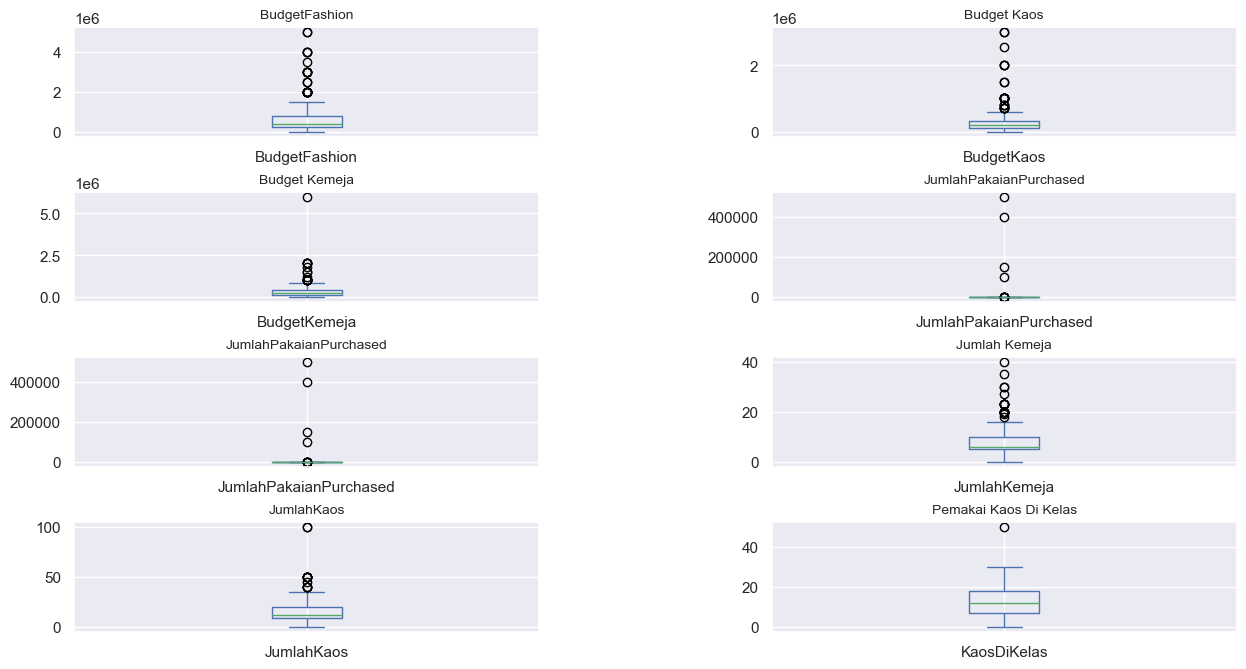

In [37]:
fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(hspace=.5, wspace=.5)

ax = fig.add_subplot(5,2,1)
df['BudgetFashion'].plot(kind='box')
ax.set_title("BudgetFashion", fontsize=10)

ax = fig.add_subplot(5,2,2)
df['BudgetKaos'].plot(kind='box')
ax.set_title("Budget Kaos", fontsize=10)

ax = fig.add_subplot(5,2,3)
df['BudgetKemeja'].plot(kind='box')
ax.set_title("Budget Kemeja", fontsize=10)

ax = fig.add_subplot(5,2,4)
df['JumlahPakaianPurchased'].plot(kind='box')
ax.set_title("JumlahPakaianPurchased", fontsize=10)

ax = fig.add_subplot(5,2,5)
df['JumlahPakaianPurchased'].plot(kind='box')
ax.set_title("JumlahPakaianPurchased", fontsize=10)

ax = fig.add_subplot(5,2,6)
df['JumlahKemeja'].plot(kind='box')
ax.set_title("Jumlah Kemeja", fontsize=10)

ax = fig.add_subplot(5,2,7)
df['JumlahKaos'].plot(kind='box')
ax.set_title("JumlahKaos", fontsize=10)

ax = fig.add_subplot(5,2,8)
df['KaosDiKelas'].plot(kind='box')
ax.set_title("Pemakai Kaos Di Kelas", fontsize=10)


plt.show()

From the boxplot above, we can see that there are a lot of outliers visible in most of the data. Therefore, we will perform outlier cleaning.

<h2 style="color:blue;">Heatmap</h2>

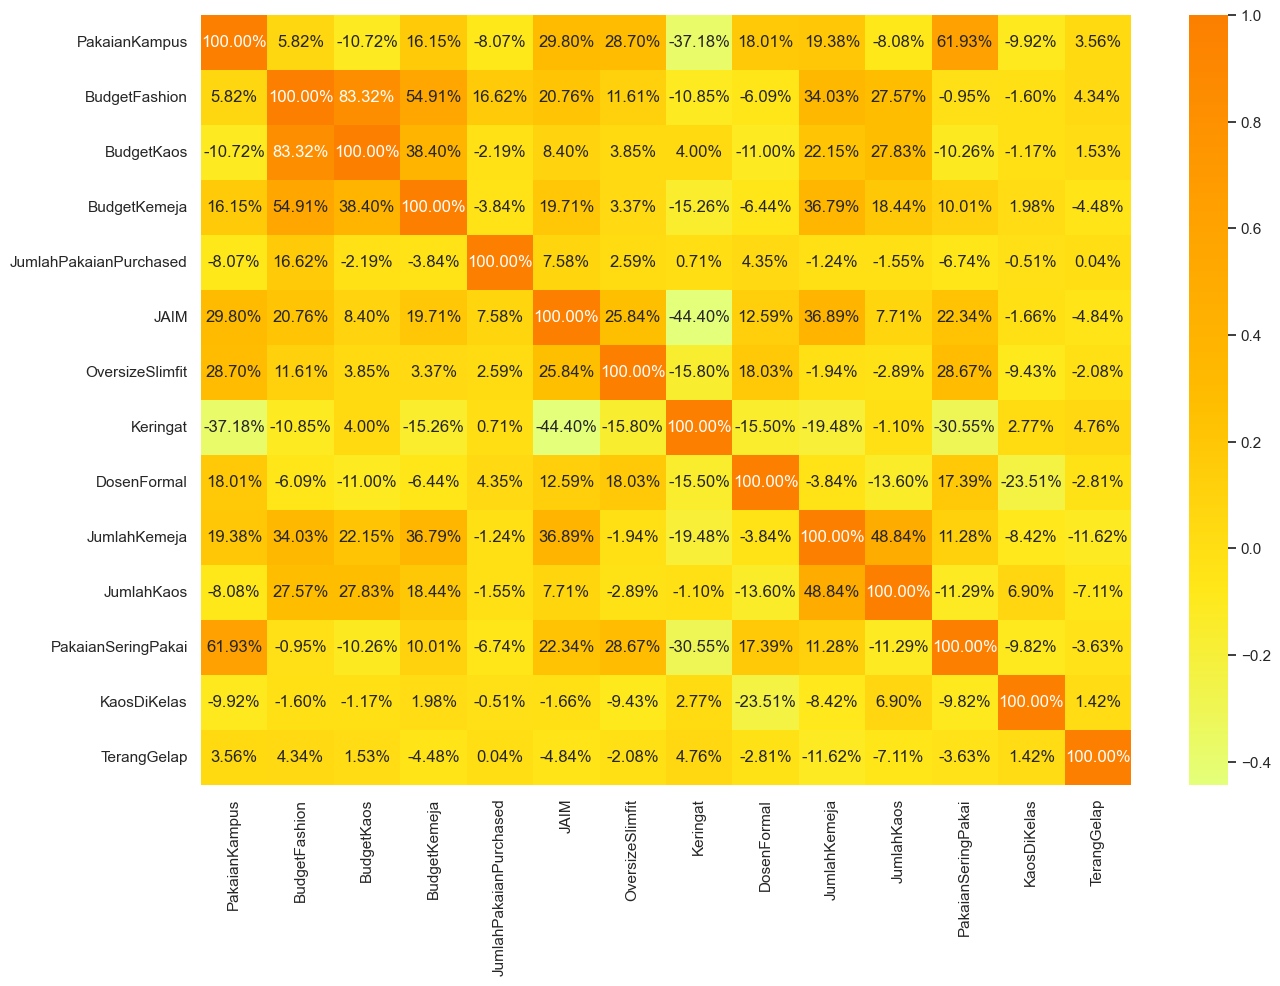

In [38]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, cmap = 'Wistia', annot= True,fmt='.2%');

From the heatmap, we can observe the correlation between all variables, both among independent variables and between independent and dependent variables. The heatmap shows that the variable with the most significant impact on variable Y is "Travel Clothing," which reflects a **positive correlation of 61.93%** with the clothing worn by students when they go to campus.

The second strongest correlation is followed by the question of whether **the student is someone who sweats easily**, which reflects a **negative correlation of 37.2%** with the clothing worn by students when they go to campus.

Meanwhile, the variable with the smallest correlation is **students' color preference for clothing**, which has only a **3.56%** correlation with the clothing worn by students when they go to campus.

<h2 style="color:blue;">Histogram</h2>

In [39]:
ax = data[['BudgetFashion', 'Gender']].groupby(['Gender']).mean()
ax

,BudgetFashion
Gender,
Laki-laki,645664.335664
Perempuan,674359.756098


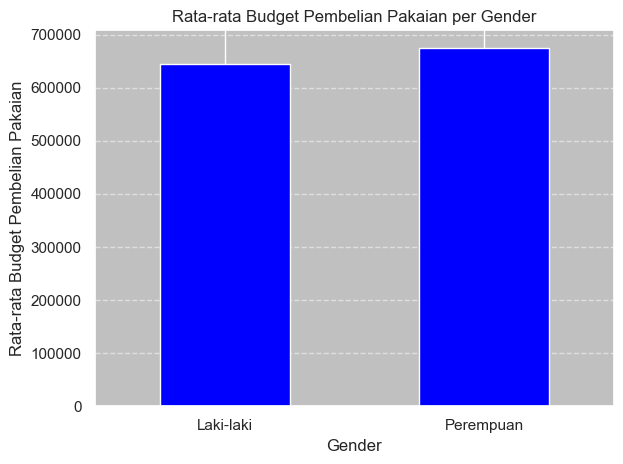

In [40]:
hist1 = data[['BudgetFashion', 'Gender']].groupby(['Gender']).mean().plot(kind='bar', color='blue', legend=False)

plt.title("Rata-rata Budget Pembelian Pakaian per Gender")
plt.xlabel("Gender")
plt.ylabel("Rata-rata Budget Pembelian Pakaian")
plt.xticks(rotation=0)

# Add gridlines
hist1.grid(axis='y', linestyle='--', alpha=0.5)

# Add background color
hist1.set_facecolor('silver')

plt.tight_layout()
plt.show()

From the following histogram, we can see that the average Clothing Purchase Budget per Gender is not significantly different, which is **Rp 645,664.33** for men and **Rp 674,359.75** for women.

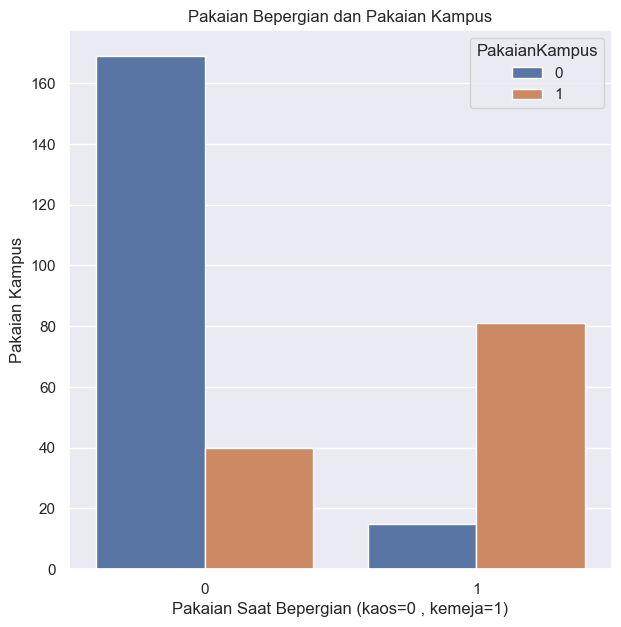

In [41]:
fig, ax=plt.subplots(figsize=(7,7))
sns.countplot(data=df, x='PakaianSeringPakai', hue='PakaianKampus')
plt.title("Pakaian Bepergian dan Pakaian Kampus")
plt.xlabel("Pakaian Saat Bepergian (kaos=0 , kemeja=1)")
plt.ylabel("Pakaian Kampus")
plt.xticks(rotation=0)
plt.show()

From the histogram, we can see that **when someone wears a t-shirt (0) while going out**, the data indicates that most of these people will also **wear a t-shirt to campus**, and vice versa.

<h2 style="color:blue;">Sebaran Data Numerik</h2>

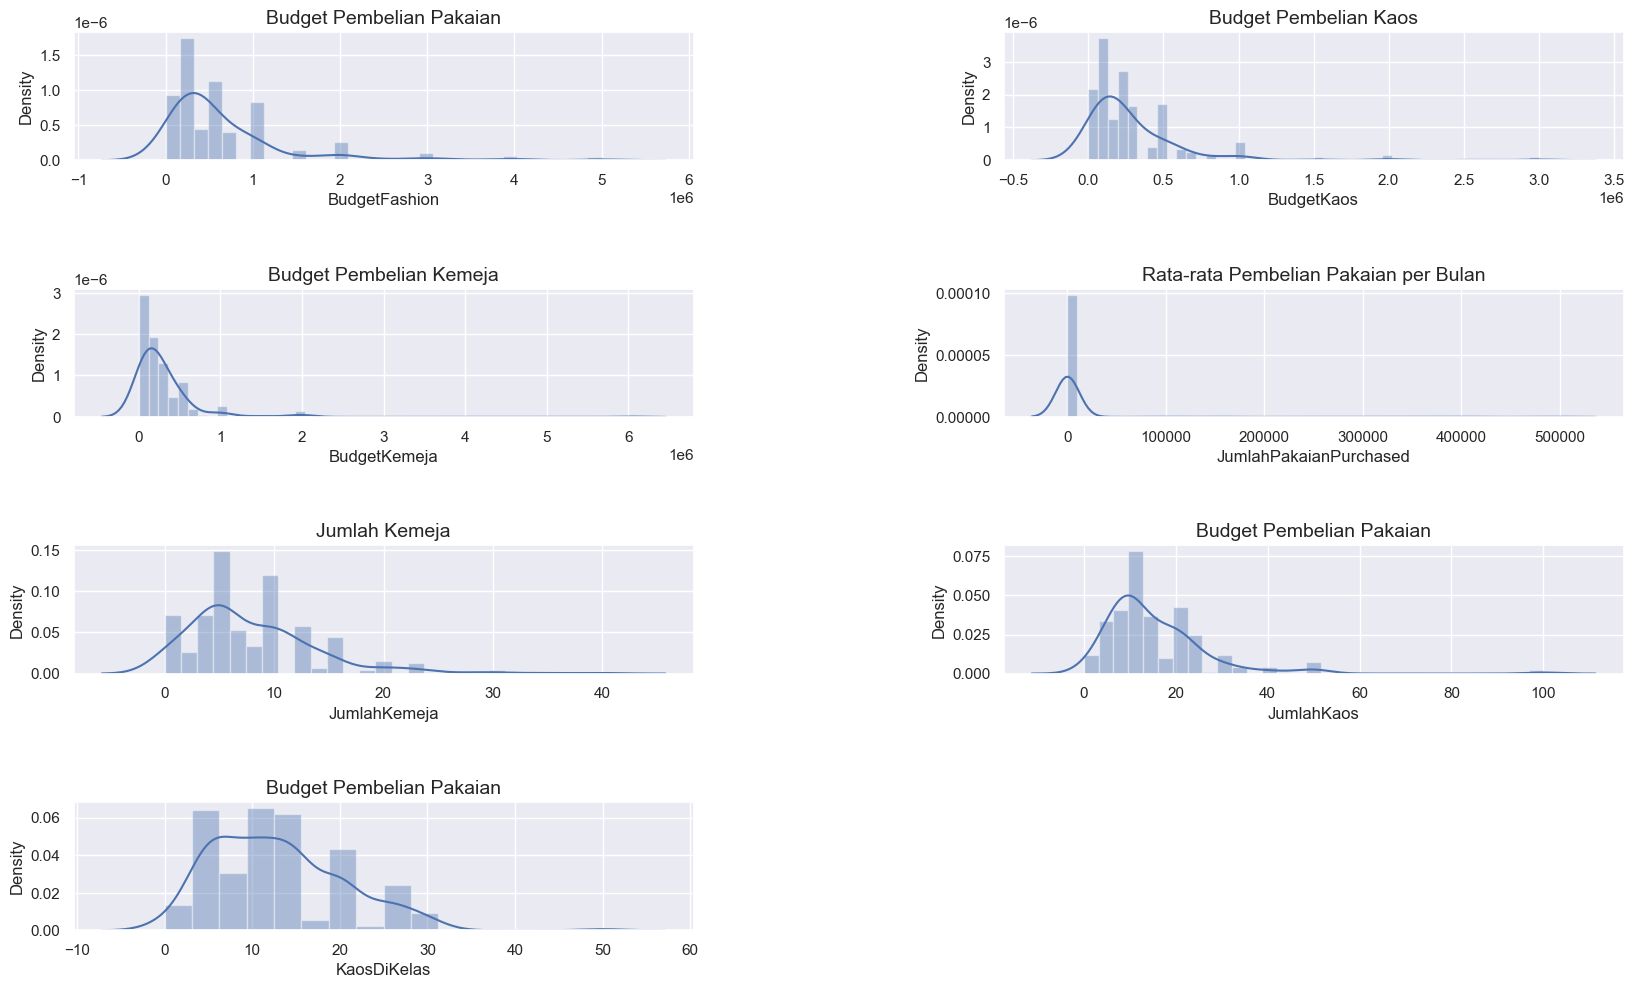

In [42]:
fig = plt.figure(figsize=(20, 15))
fig.subplots_adjust(hspace=1, wspace=.5)

ax = fig.add_subplot(5,2,1)
plt.title('Budget Pembelian Pakaian', fontsize=14)
sns.distplot(df['BudgetFashion'])

ax = fig.add_subplot(5,2,2)
plt.title('Budget Pembelian Kaos', fontsize=14)
sns.distplot(df['BudgetKaos'])

ax = fig.add_subplot(5,2,3)
plt.title('Budget Pembelian Kemeja', fontsize=14)
sns.distplot(df['BudgetKemeja'])

ax = fig.add_subplot(5,2,4)
plt.title('Rata-rata Pembelian Pakaian per Bulan', fontsize=14)
sns.distplot(df['JumlahPakaianPurchased'])

ax = fig.add_subplot(5,2,5)
plt.title('Jumlah Kemeja', fontsize=14)
sns.distplot(df['JumlahKemeja'])

ax = fig.add_subplot(5,2,6)
plt.title('Budget Pembelian Pakaian', fontsize=14)
sns.distplot(df['JumlahKaos'])

ax = fig.add_subplot(5,2,7)
plt.title('Budget Pembelian Pakaian', fontsize=14)
sns.distplot(df['KaosDiKelas'])


plt.show()

From the distribution plot above, we can see that:

1.  The distribution of Budget for Purchasing Clothes, T-shirts, and Shirts ranges from
    between 0-1 million rupiah
2.  The number of shirt ownership is spread between 0-20 pcs
3.  The average purchase of clothes per month (in times) is the highest at
    at one time per month.
4.  The number of T-shirts is spread between 0-40 pcs
5.  The distribution of T-shirt wearers in class ranges from 0-30 people per class, with the highest value ranging from 0-15 people per class.

<div style="height:5px; background: linear-gradient(to right, purple, blue);"></div>

<h2 style="color:navy;">7. Remove Outliers</h2>

In [43]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
print('Q1: \n',Q1)
print('Q3: \n',Q3)

Q1: 
 PakaianKampus                  0.0
BudgetFashion             250000.0
BudgetKaos                100000.0
BudgetKemeja              100000.0
JumlahPakaianPurchased         1.0
JAIM                           0.0
OversizeSlimfit                0.0
Keringat                       0.0
DosenFormal                    0.0
JumlahKemeja                   5.0
JumlahKaos                     9.0
PakaianSeringPakai             0.0
KaosDiKelas                    7.0
TerangGelap                    0.0
Name: 0.25, dtype: float64
Q3: 
 PakaianKampus                  1.0
BudgetFashion             800000.0
BudgetKaos                320000.0
BudgetKemeja              400000.0
JumlahPakaianPurchased         4.0
JAIM                           1.0
OversizeSlimfit                1.0
Keringat                       1.0
DosenFormal                    1.0
JumlahKemeja                  10.0
JumlahKaos                    20.0
PakaianSeringPakai             1.0
KaosDiKelas                   18.0
TerangGelap     

In [44]:
IQR = Q3 - Q1
print(IQR)

PakaianKampus                  1.0
BudgetFashion             550000.0
BudgetKaos                220000.0
BudgetKemeja              300000.0
JumlahPakaianPurchased         3.0
JAIM                           1.0
OversizeSlimfit                1.0
Keringat                       1.0
DosenFormal                    1.0
JumlahKemeja                   5.0
JumlahKaos                    11.0
PakaianSeringPakai             1.0
KaosDiKelas                   11.0
TerangGelap                    1.0
dtype: float64


In [45]:
df2 = df[~((df < (Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
df2.shape

(246, 14)

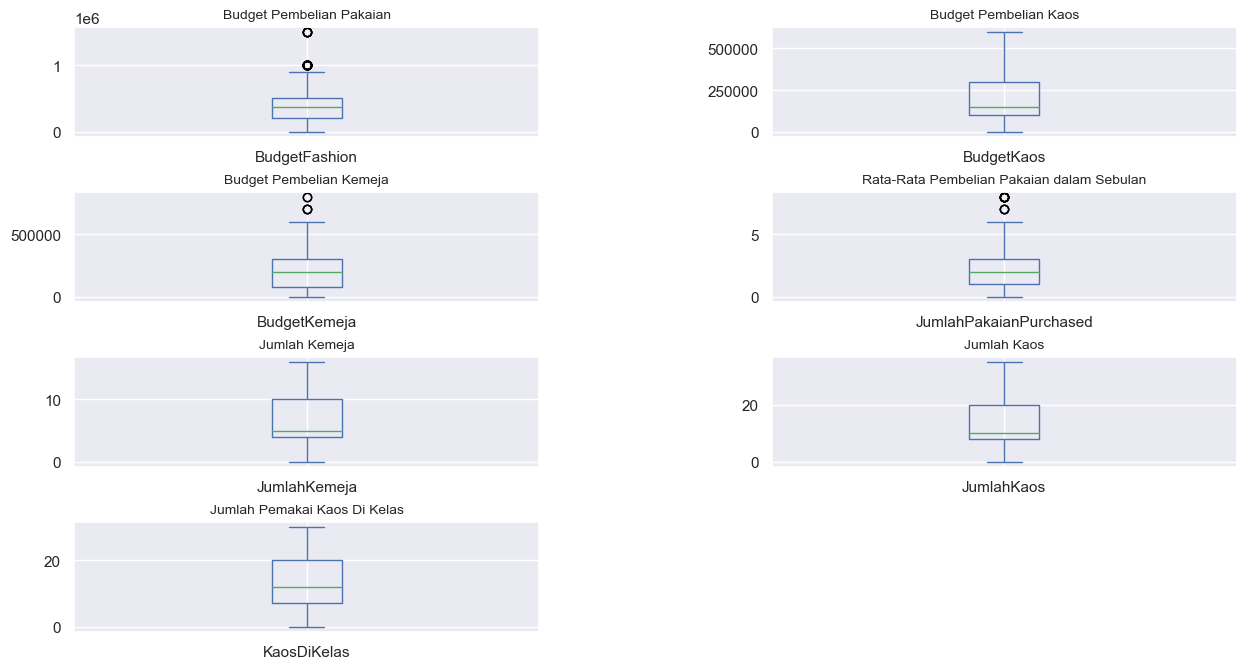

In [46]:
fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(hspace=.5, wspace=.5)

ax = fig.add_subplot(5,2,1)
df2['BudgetFashion'].plot(kind='box')
ax.set_title("Budget Pembelian Pakaian", fontsize=10)

ax = fig.add_subplot(5,2,2)
df2['BudgetKaos'].plot(kind='box')
ax.set_title("Budget Pembelian Kaos", fontsize=10)

ax = fig.add_subplot(5,2,3)
df2['BudgetKemeja'].plot(kind='box')
ax.set_title("Budget Pembelian Kemeja", fontsize=10)

ax = fig.add_subplot(5,2,4)
df2['JumlahPakaianPurchased'].plot(kind='box')
ax.set_title("Rata-Rata Pembelian Pakaian dalam Sebulan", fontsize=10)

ax = fig.add_subplot(5,2,5)
df2['JumlahKemeja'].plot(kind='box')
ax.set_title("Jumlah Kemeja", fontsize=10)

ax = fig.add_subplot(5,2,6)
df2['JumlahKaos'].plot(kind='box')
ax.set_title("Jumlah Kaos", fontsize=10)

ax = fig.add_subplot(5,2,7)
df2['KaosDiKelas'].plot(kind='box')
ax.set_title("Jumlah Pemakai Kaos Di Kelas", fontsize=10)


plt.show()

From the Boxplot above we can see **there are a lot of outliers that
appear in most of the data**. Therefore, we will perform
**outlier cleaning**.

<div style="height:5px; background: linear-gradient(to right, purple, blue);"></div>

<h2 style="color:navy;">8. Building The Model</h2>

In [47]:
from sys import version_info

In [48]:
from time import time
from IPython.display import display 
%matplotlib inline

<h2 style="color:blue;">Split The Data</h2>

In [49]:
dfx=df2.drop("PakaianKampus", axis=1)

In [50]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df2, test_size=0.2, random_state=2)
train_index = train.index
test_index = test.index

In [51]:
X_train = train.drop(['PakaianKampus'],axis=1)
y_train = train[['PakaianKampus']]
X_test = test.drop(['PakaianKampus'],axis=1)
y_test = test[['PakaianKampus']]

In [52]:
print(f'Shape of X Train= {X_train.shape}, Shape of X Test = {X_test.shape}')
print(f'Shape of y Train= {y_train.shape}, Shape of y Test = {y_test.shape}')

Shape of X Train= (196, 13), Shape of X Test = (50, 13)
Shape of y Train= (196, 1), Shape of y Test = (50, 1)


<h2 style="color:blue;">First Model: KNN</h2>

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [54]:
y = df2['PakaianKampus']
X = df2.drop('PakaianKampus', axis = 1)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.3, random_state = 0)

In [56]:
K = []
training = []
test = []
scores = {}
  
for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)
  
    training_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

In [57]:
for keys, values in scores.items():
	print(keys, ':', values)

2 : [0.872093023255814, 0.6756756756756757]
3 : [0.872093023255814, 0.6621621621621622]
4 : [0.8081395348837209, 0.6891891891891891]
5 : [0.7965116279069767, 0.6486486486486487]
6 : [0.7732558139534884, 0.6891891891891891]
7 : [0.7906976744186046, 0.7297297297297297]
8 : [0.7848837209302325, 0.6756756756756757]
9 : [0.7848837209302325, 0.6621621621621622]
10 : [0.7790697674418605, 0.6756756756756757]
11 : [0.7616279069767442, 0.6621621621621622]
12 : [0.7616279069767442, 0.6621621621621622]
13 : [0.7674418604651163, 0.6621621621621622]
14 : [0.75, 0.6621621621621622]
15 : [0.7616279069767442, 0.6621621621621622]
16 : [0.7616279069767442, 0.6486486486486487]
17 : [0.7674418604651163, 0.6621621621621622]
18 : [0.7558139534883721, 0.6756756756756757]
19 : [0.7674418604651163, 0.6621621621621622]
20 : [0.7616279069767442, 0.6756756756756757]


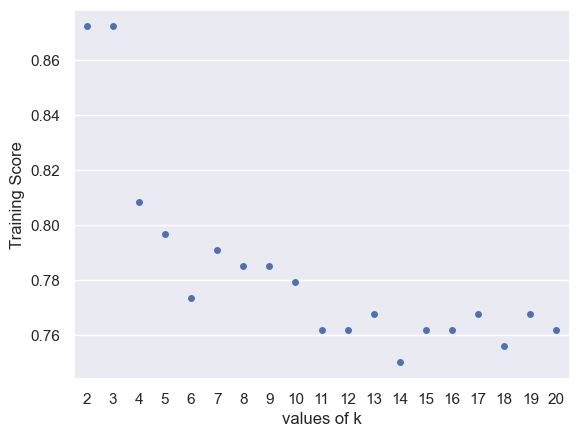

In [58]:
ax = sns.stripplot(x=K, y=training);
ax.set(xlabel ='values of k', ylabel ='Training Score')   
plt.show()

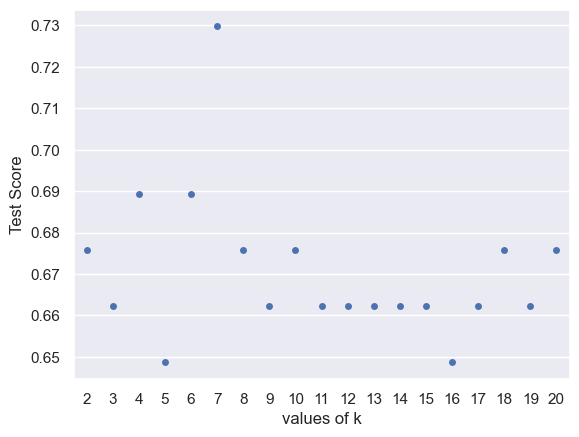

In [59]:
ax = sns.stripplot(x=K, y=test);
ax.set(xlabel ='values of k', ylabel ='Test Score')
plt.show()

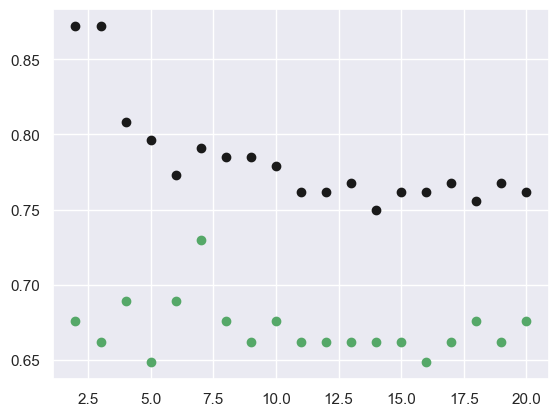

In [60]:
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()

<h2 style="color:blue;">Second Model: Decision Tree</h2>

In [61]:
dtree = DecisionTreeClassifier(max_depth=5, random_state=45)
dtree = dtree.fit(X_train, y_train)

In [62]:
from sklearn import metrics

clf_pred_test = dtree.predict(X_test)
clf_pred_train = dtree.predict(X_train)

train_score=metrics.accuracy_score(y_train, clf_pred_train)
test_score=metrics.accuracy_score(y_test, clf_pred_test)

print('Train Accuracy Score:',f'{train_score: 0.2%}')
print('Test Accuracy Score:', f'{test_score: 0.2%}')

Train Accuracy Score:  93.02%
Test Accuracy Score:  81.08%


**Train Confusion Matrix**

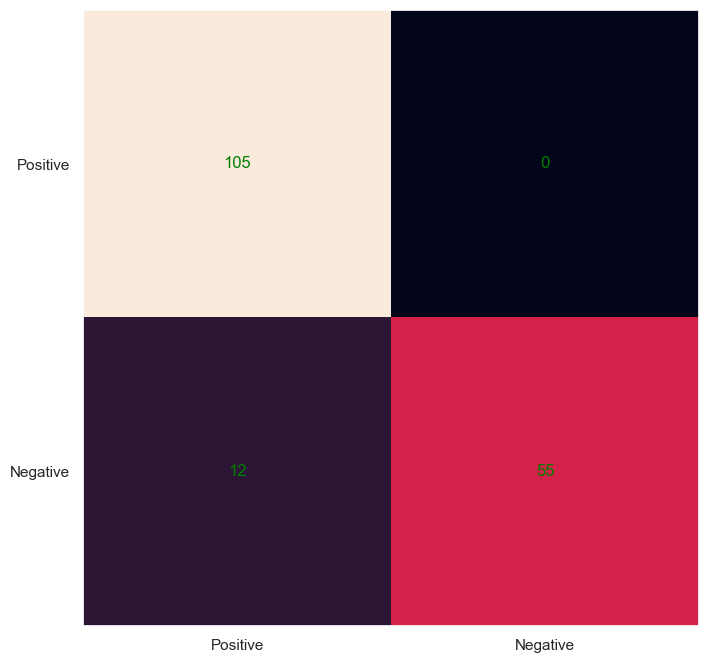

In [63]:
clf_pred_train =dtree.predict(X_train)
cm = confusion_matrix(y_train, clf_pred_train)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='green')

plt.show()

**Test Confusion Matrix**

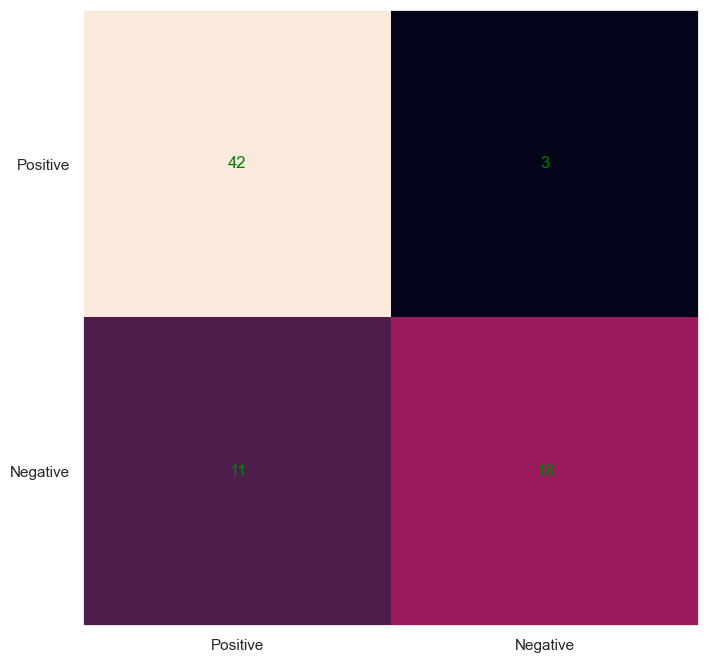

In [64]:
clf_pred_test =dtree.predict(X_test)
cm1 = confusion_matrix(y_test, clf_pred_test)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm1)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm1[i,j], ha='center',va='center',color='green')

plt.show()

**Train Metrics**

In [65]:
TN_train = cm[0][0]
TP_train = cm[1][1]
FN_train = cm[1][0]
FP_train = cm[0][1]

accuracy_train = (TN_train + TP_train) / (TN_train + FP_train + FN_train+ TP_train)
sensitivity_train = TP_train / (TP_train + FN_train)
precision_train = TP_train / (TP_train + FP_train)

print('The model accuracy accuracy of training data:',f'{accuracy_train: 0.2%}')
print('The model sensitivity of training data:', f'{sensitivity_train: 0.2%}')
print('The model precision of training data:', f'{precision_train: 0.2%}')

The model accuracy accuracy of training data:  93.02%
The model sensitivity of training data:  82.09%
The model precision of training data:  100.00%


**Test Metrics**

In [66]:
TN_test = cm1[0][0]
TP_test = cm1[1][1]
FN_test = cm1[1][0]
FP_test = cm1[0][1]

accuracy_test = (TN_test + TP_test) / (TN_test + FP_test + FN_test+ TP_test)
sensitivity_test = TP_test / (TP_test + FN_test)
precision_test = TP_test / (TP_test + FP_test)

print('The model accuracy accuracy of testing data:',f'{accuracy_test: 0.2%}')
print('The model sensitivity of testing data:', f'{sensitivity_test: 0.2%}')
print('The model precision of testing data:', f'{precision_test: 0.2%}')

The model accuracy accuracy of testing data:  81.08%
The model sensitivity of testing data:  62.07%
The model precision of testing data:  85.71%


**Comparing Train and Test Metrics**

In [67]:
metrics = ['Accuracy', 'Sensitivity', 'Precision']
performance_train = [accuracy_train, sensitivity_train, precision_train]
performance_test = [accuracy_test, sensitivity_test, precision_test]
performance1 = pd.DataFrame({'Metrics': metrics, 'Training Data': performance_train, 'Testing Data': performance_test})
performance1.style.format({'Training Data':'{:,.2%}', 'Testing Data':'{:.2%}'})

,Metrics,Training Data,Testing Data
0,Accuracy,93.02%,81.08%
1,Sensitivity,82.09%,62.07%
2,Precision,100.00%,85.71%


It can be seen that the training model has a fit of 91.08% with the original data while our testing model has a fit of only 72.83%. This shows that our model is an overfitting model. In terms of sensitivity, it can be seen that the model has been able to 78.31% correctly identify positive training cases and 60.53% positive testing cases. While the greater Precision indicates that the error rate is getting smaller and the value produced by the model is more precise (closer to the original value).

**Decision Tree**

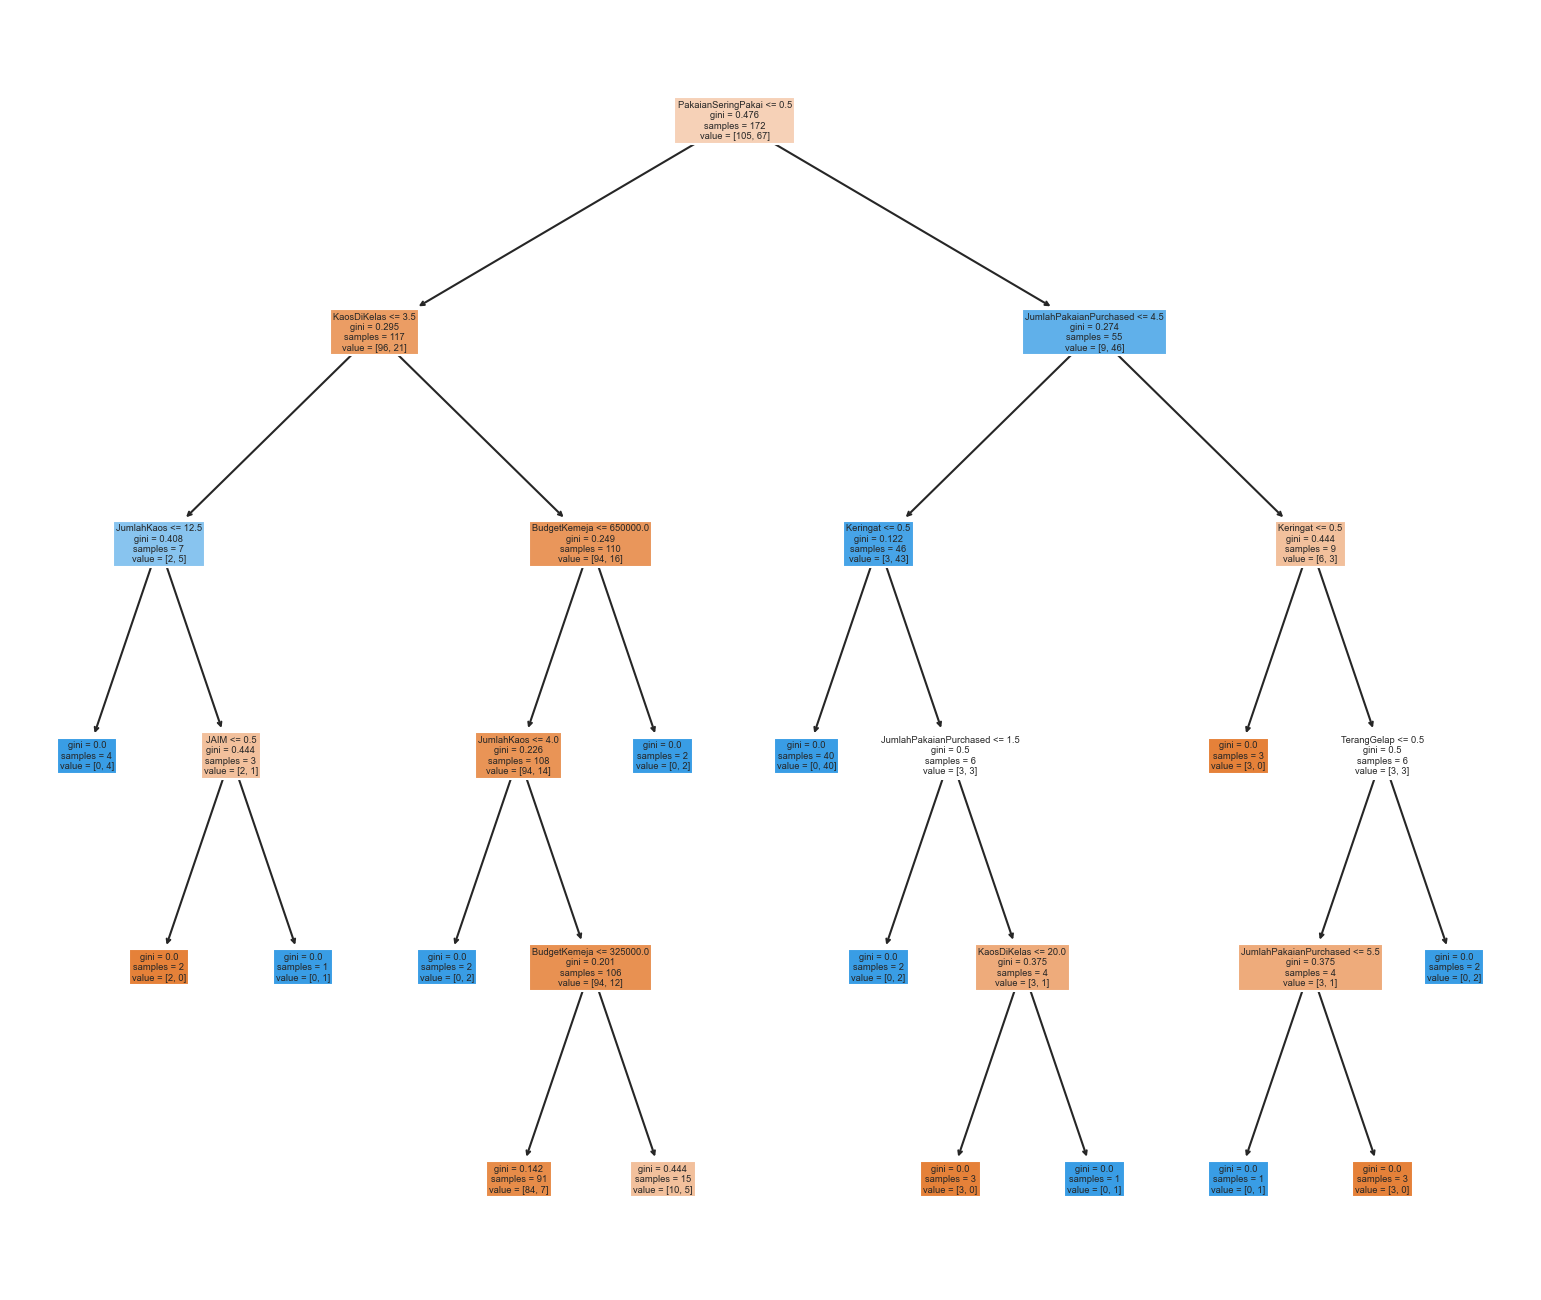

In [68]:
plt.figure(figsize=(13,11), dpi=150)
tree.plot_tree(dtree, feature_names=X_train.columns, filled=True);

<h2 style="color:blue;">Third Model:Random Forest</h2>

In [69]:
from time import time
from IPython.display import display
%matplotlib inline

In [70]:
display(df2.head(5))
# initial test

,PakaianKampus,BudgetFashion,BudgetKaos,BudgetKemeja,JumlahPakaianPurchased,JAIM,OversizeSlimfit,Keringat,DosenFormal,JumlahKemeja,JumlahKaos,PakaianSeringPakai,KaosDiKelas,TerangGelap
1,0,1000000,500000,500000,8,1,0,0,0,15,20,0,25,0
2,0,20000,100000,200000,1,1,0,0,0,10,5,0,7,1
3,1,300000,50000,300000,2,1,1,0,0,10,10,1,10,1
4,0,500000,150000,200000,2,1,0,0,0,5,6,0,15,0
5,0,250000,250000,400000,1,0,0,1,0,4,24,0,24,0


In [71]:
kemejakaos_raw = df2['PakaianKampus']
features_raw = df2.drop('PakaianKampus',axis=1)

In [72]:
n_records = len(df2)

n_0 = 182

n_1 = 122

In [73]:
features = pd.get_dummies(features_raw)

pakaian = kemejakaos_raw.replace(['0','1'],[0,1])

encoded = list(features.columns)
print(encoded)

['BudgetFashion', 'BudgetKaos', 'BudgetKemeja', 'JumlahPakaianPurchased', 'JAIM', 'OversizeSlimfit', 'Keringat', 'DosenFormal', 'JumlahKemeja', 'JumlahKaos', 'PakaianSeringPakai', 'KaosDiKelas', 'TerangGelap']


In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, pakaian, test_size = 0.2, random_state = 0,
                                                    stratify = pakaian)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0,
                                                    stratify = y_train)

print("Training set has {} samples.",X_train.shape[0])
print("Validation set has {} samples.",X_val.shape[0])
print("Testing set has {} samples.",X_test.shape[0])

Training set has {} samples. 156
Validation set has {} samples. 40
Testing set has {} samples. 50


In [75]:
TP=float(n_0)
TN=0
FP=float(n_records - n_0)
FN=0

accuracy = float(n_0) / n_records

precision = TP / (TP + FP)

recall = TP / (TP + TN)

beta = 0.5
fscore = (1 + np.power(beta,2)) * precision * recall / ((np.power(beta,2)*precision) + recall)

In [76]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_val, y_val): 
        
    results = {}
    
    start = time() 
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() 
    
    
    results['train_time'] = end - start
    
    start = time()
    predictions_val = learner.predict(X_val)
    predictions_train = learner.predict(X_train[:300])
    end = time() 
    
    results['pred_time'] = end - start
            
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    results['acc_val'] = accuracy_score(y_val, predictions_val)
    
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    results['f_val'] = fbeta_score(y_val, predictions_val, beta=0.5)
       
    return results

In [77]:
X = features_raw
y = kemejakaos_raw

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=300)

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=300, max_features="sqrt", random_state=300)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=300)

In [78]:
predictions = rf_model.predict(X_test)
predictions

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

In [79]:
from sklearn import ensemble

clf_C = ensemble.RandomForestClassifier(random_state=44)

samples_1 = int(X_train.shape[0] * 0.01)
samples_10 = int(X_train.shape[0] * 0.1)
samples_100 = int(X_train.shape[0])

results = {}
for clf in [clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_val, y_val)

print("Results: ", results)
print("")
print("Accuracy at current point: ",accuracy)
print("Current F-Score: ",fscore)
print("")
print("Accuracy Max at 0.9387755102040817")

Results:  {'RandomForestClassifier': {0: {'train_time': 0.3389763832092285, 'pred_time': 0.06249713897705078, 'acc_train': 0.5872093023255814, 'acc_val': 0.6, 'f_train': 0.0, 'f_val': 0.0}, 1: {'train_time': 0.30910706520080566, 'pred_time': 0.050678253173828125, 'acc_train': 0.7732558139534884, 'acc_val': 0.85, 'f_train': 0.7564575645756457, 'f_val': 0.8333333333333334}, 2: {'train_time': 0.33171701431274414, 'pred_time': 0.04848051071166992, 'acc_train': 1.0, 'acc_val': 0.975, 'f_train': 1.0, 'f_val': 0.9523809523809523}}}

Accuracy at current point:  0.7398373983739838
Current F-Score:  0.7804459691252144

Accuracy Max at 0.9387755102040817


[Text(0.3980263157894737, 0.9444444444444444, 'x[4] <= 0.5\ngini = 0.461\nsamples = 111\nvalue = [110.0, 62.0]'),
 Text(0.13157894736842105, 0.8333333333333334, 'x[2] <= 270000.0\ngini = 0.112\nsamples = 43\nvalue = [63, 4]'),
 Text(0.05263157894736842, 0.7222222222222222, 'x[7] <= 0.5\ngini = 0.033\nsamples = 35\nvalue = [58, 1]'),
 Text(0.02631578947368421, 0.6111111111111112, 'gini = 0.0\nsamples = 27\nvalue = [46, 0]'),
 Text(0.07894736842105263, 0.6111111111111112, 'x[0] <= 225000.0\ngini = 0.142\nsamples = 8\nvalue = [12, 1]'),
 Text(0.05263157894736842, 0.5, 'x[12] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.02631578947368421, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.07894736842105263, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.10526315789473684, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [11, 0]'),
 Text(0.21052631578947367, 0.7222222222222222, 'x[0] <= 1250000.0\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),

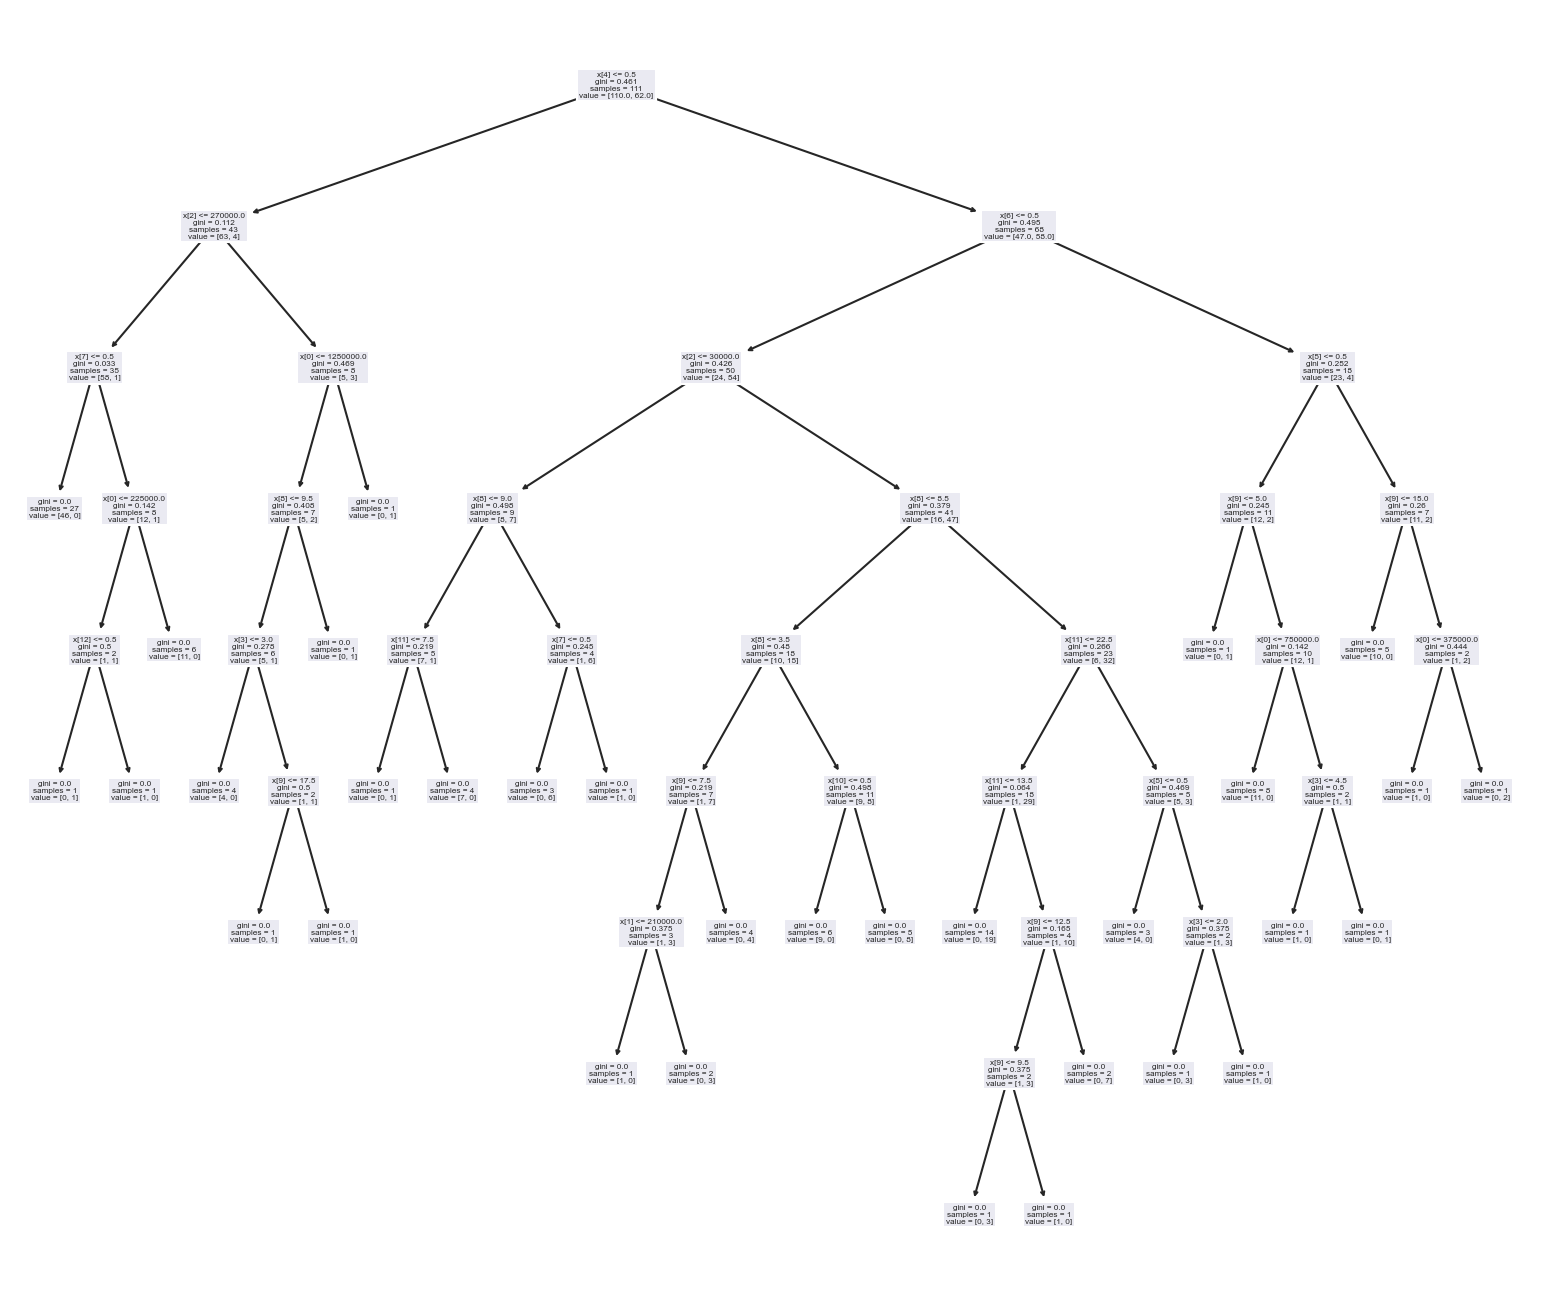

In [80]:
plt.figure(figsize=(13,11), dpi=150)
tree.plot_tree(clf.estimators_[1])

In [81]:
# plt.figure(figsize=(13,11), dpi=150)
# for i in range(len(clf.estimators_)):
#     tree.plot_tree(clf.estimators_[i])
#     plt.savefig('fig'+str(i))
#     plt.show()

**Comparison of Results**

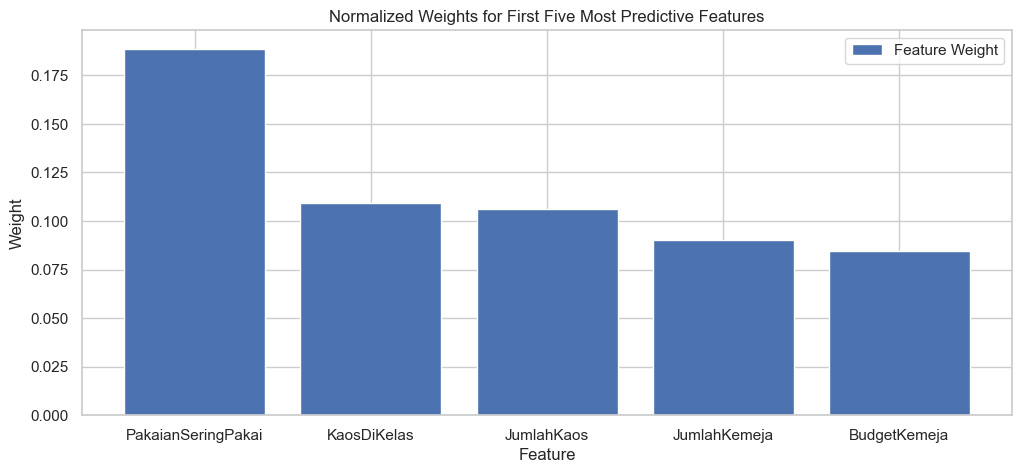

In [82]:
importances = rf_model.feature_importances_

feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]

importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

top_5_importances_df = importances_df.sort_values(by='Importance', ascending=False).head(5)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 5))
plt.bar(top_5_importances_df['Feature'], top_5_importances_df['Importance'], color='b', label='Feature Weight')
plt.xlabel('Feature')
plt.ylabel('Weight')
plt.title('Normalized Weights for First Five Most Predictive Features')
plt.legend()

plt.show()

<div style="height:5px; background: linear-gradient(to right, purple, blue);"></div>

<h2 style="color:navy;">Conclusion and Decision</h2>

From the perspective of time-consuming, KNN takes the least time to train and predict in the case of a large amount of data, and it is not suitable for dealing with current problems.

From the perspective of accuracy and F1 score, although the score of the decision tree on the training set is higher than that of the random forest, the score of the random forest on the prediction set is higher than that of the decision tree.

It can be seen that the decision tree is better than the random forest on the current problem. The generalization ability is low, so it is more appropriate to use random forest to deal with the current problem, since random forest is a collection of multiple decision tree models.

Theory:

The construction process of the decision tree: the decision tree forms a decision tree structure by traversing all the features, each node of the tree is the first decision formula, there are two kinds of judgments, from the root to the leaf node, and the final leaf A node is the final result of the decision and whether it is a possible donor. If the value of the node is discrete, then a decision node with different numbers of values will be generated; if the value of the node is continuous, it is necessary to determine a division point and set the value to '0' And '1' two parts.

The prediction process of the decision tree: traverse down from the root node to determine the results of each node until the root node, so as to obtain the final determination result and know whether a candidate is a possible donor.

The construction process of the random forest: k samples are randomly selected from the training samples, and k decision trees are generated to form a random forest.

The prediction process of random forest: the classification result of new data is determined by the score formed by the number of votes of k decision trees.

**Random Forest is the best classification for our case.**

## Final Model Evaluation<a href="#Final-Model-Evaluation" class="anchor-link">¶</a>
#### Result:<a href="#Result:" class="anchor-link">¶</a>

| Evaluation Metrics | Decision Tree | Unoptimized Models with KNN | Optimized Models with Random Forest |
|:------------------:|:-------------:|:---------------------------:|:-----------------------------------:|
|      Accuracy      |    0.8209     |           0.7419            |               0.9387                |
|      F1-score       |    0.9302     |           0.6878            |               0.7804                |

An important task of using supervised learning algorithms on data (such
as the census data we use here) is to decide which features provide the
strongest predictive power. By focusing on the relationship between a
small number of valid features and labels, we can understand these
phenomena more simply, which is very useful in many cases.

**Conclusion**: Random Forest is chosen as the most confident model with
good accuracy and F-score scores in the previous grid cross-validation
link. Its accuracy rate and F-score score on the test set have a small
gap with the test result score of the grid cross-validation link, and it
has a good generalization effect.